In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set_style("dark")

### Data dictionary

**survival**-Survival (0 = No, 1 = Yes)

**pclass**-Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

**sex**-Sex	

**Age**-Age in years	

**sibsp**-of siblings / spouses aboard the Titanic	

**parch**- of parents / children aboard the Titanic	

**ticket**-Ticket number	

**fare**-Passenger fare	

**cabin**-Cabin number	

**embarked**-Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [6]:
test=pd.read_csv("C://kaggle/titanic/test.csv")
train=pd.read_csv("C://kaggle/titanic/train.csv")

In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test.shape

(418, 11)

In [10]:
train.shape

(891, 12)

In [11]:
df=pd.concat([train,test])

In [12]:
df.shape


(1309, 12)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


Text(0, 0.5, 'count')

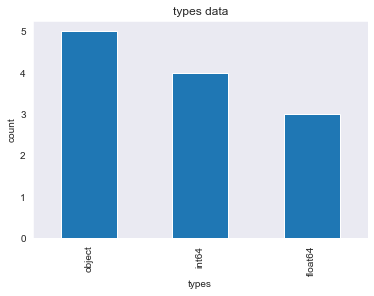

In [14]:
df.dtypes.value_counts().plot(kind='bar',title='types data')
plt.xlabel('types')
plt.ylabel('count')

In [15]:
df.drop(['PassengerId','Cabin'],axis=1,inplace=True)

In [16]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Text(0.5, 1.0, 'before clean age ')

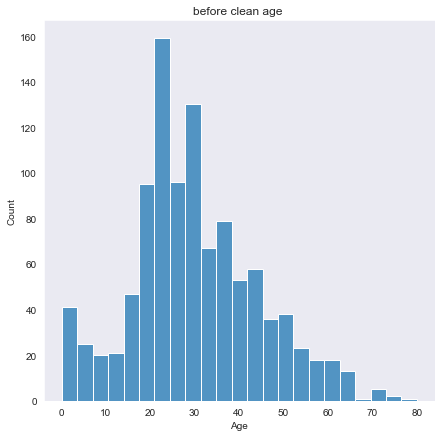

In [17]:
fg,ax= plt.subplots(figsize=(7,7))
age=df.Age.dropna()
sns.histplot(data=age,ax=ax).set_title('before clean age ')

In [18]:
df['Age']=df.Age.fillna(df.Age.median())

In [19]:
age=df.Age
age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
413    28.0
414    39.0
415    38.5
416    28.0
417    28.0
Name: Age, Length: 1309, dtype: float64

Text(0.5, 1.0, 'after clean age ')

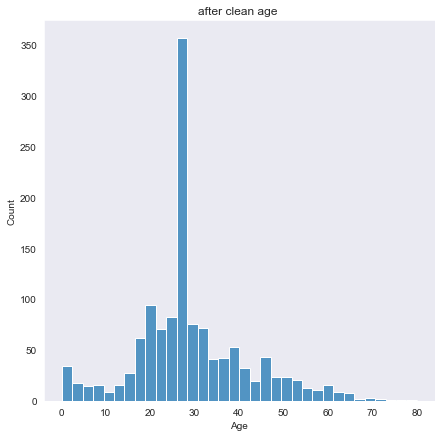

In [20]:
fg,ax= plt.subplots(figsize=(7,7))

sns.histplot(data=age,ax=ax).set_title('after clean age ')

In [21]:
df['Embarked']=df.Embarked.fillna(df.Embarked.mode()[0])

In [22]:
df['Fare']=df.Fare.fillna(df.Fare.mode()[0])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1309 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1309 non-null   float64
 9   Embarked  1309 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 112.5+ KB


In [24]:
def show_chart(df,column,title):
    fg,ax=plt.subplots(figsize=(7,7))
    df[column].dropna().value_counts().plot(kind='bar',title=f'{title} disturb')
    plt.xlabel(title)
    plt.ylabel('count')

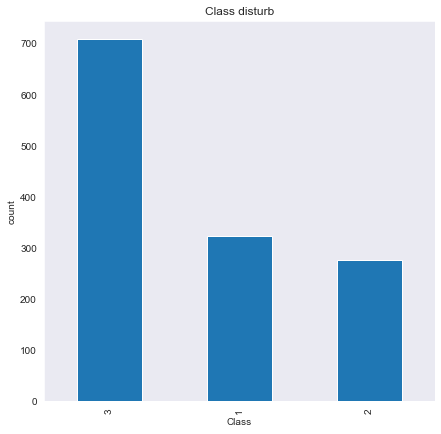

In [25]:
show_chart(df,'Pclass','Class')

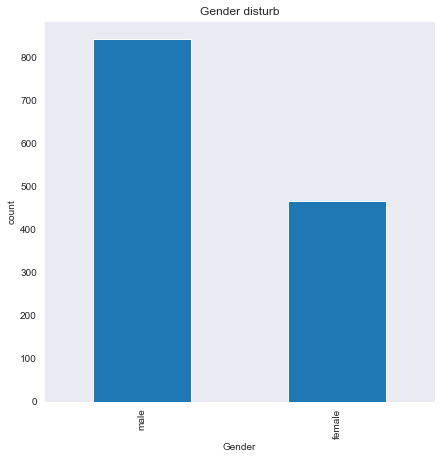

In [26]:
show_chart(df,'Sex','Gender')

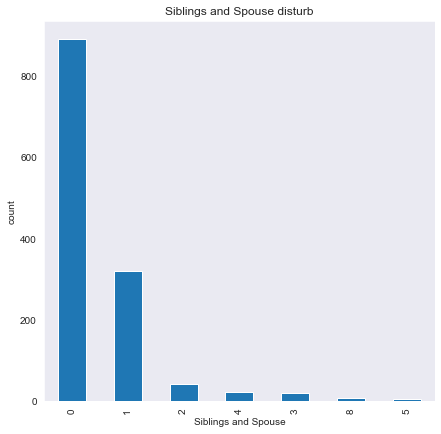

In [27]:
show_chart(df,"SibSp","Siblings and Spouse")

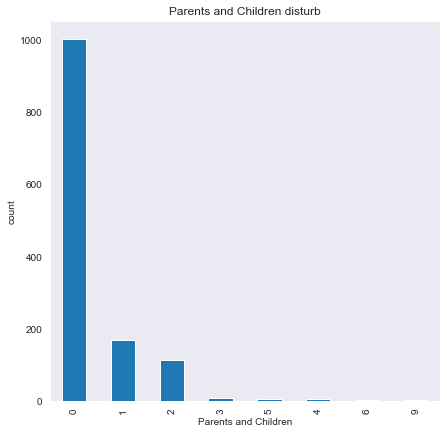

In [28]:
show_chart(df,"Parch","Parents and Children")

Text(0.5, 1.0, 'age survived ratio')

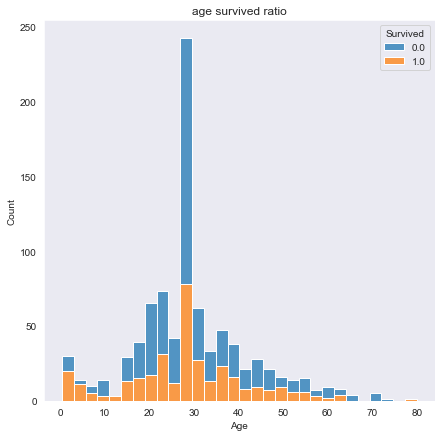

In [29]:
fig, ax = plt.subplots(figsize=(7,7))
sns.histplot(data=df.dropna(), x='Age', hue='Survived',multiple='stack',ax=ax).set_title('age survived ratio')

Text(0.5, 1.0, 'age survived ratio')

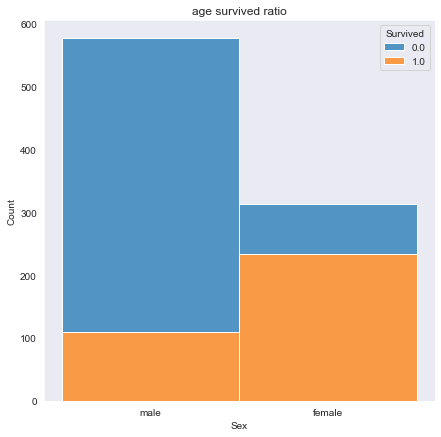

In [30]:
fig, ax = plt.subplots(figsize=(7,7))
sns.histplot(data=df.dropna(), x='Sex', hue='Survived',multiple='stack',ax=ax).set_title('age survived ratio')

Text(0.5, 1.0, 'age survived ratio')

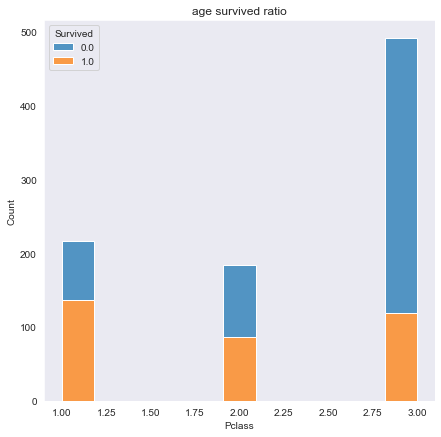

In [31]:
fig, ax = plt.subplots(figsize=(7,7))
sns.histplot(data=df.dropna(), x='Pclass', hue='Survived',multiple='stack',ax=ax).set_title('age survived ratio')

Text(0.5, 1.0, 'age survived ratio')

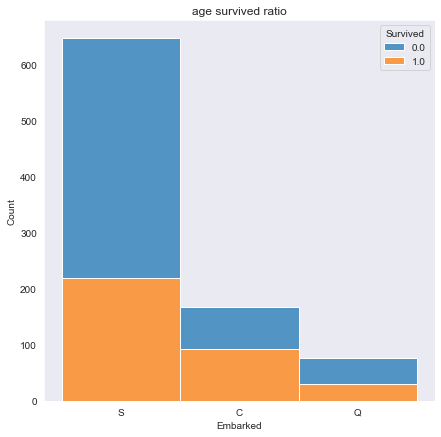

In [32]:
fig, ax = plt.subplots(figsize=(7,7))
sns.histplot(data=df.dropna(), x='Embarked', hue='Survived',multiple='stack',ax=ax).set_title('age survived ratio')

Text(0.5, 1.0, 'age survived ratio')

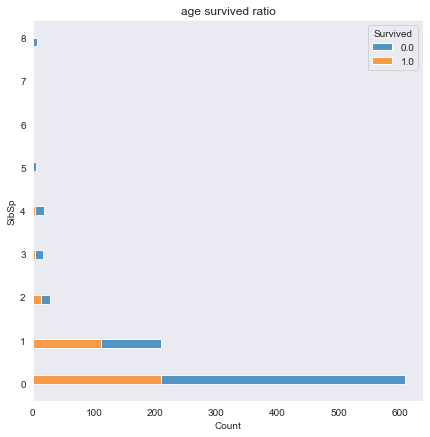

In [33]:
fig, ax = plt.subplots(figsize=(7,7))
sns.histplot(data=df.dropna(), y='SibSp', hue='Survived',multiple='stack',ax=ax).set_title('age survived ratio')

Text(0.5, 1.0, 'age survived ratio')

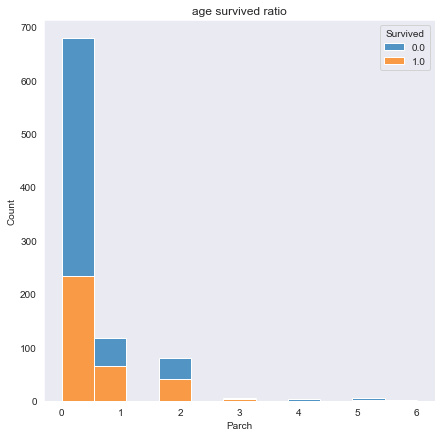

In [34]:
fig, ax = plt.subplots(figsize=(7,7))
sns.histplot(data=df.dropna(), x='Parch', hue='Survived',multiple='stack',ax=ax).set_title('age survived ratio')

In [35]:
df.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
413                                   Spector, Mr. Woolf
414                         Oliva y Ocana, Dona. Fermina
415                         Saether, Mr. Simon Sivertsen
416                                  Ware, Mr. Frederick
417                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [36]:
def get_initial(name):
    return name.split(",")[1].split(". ")[0]

df['Initial'] = df['Name'].apply(lambda x: get_initial(x))

In [37]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Initial
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,S,Mr
414,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,Dona
415,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr
416,NaN,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,S,Mr


Text(0.5, 1.0, 'initial to surv ratio')

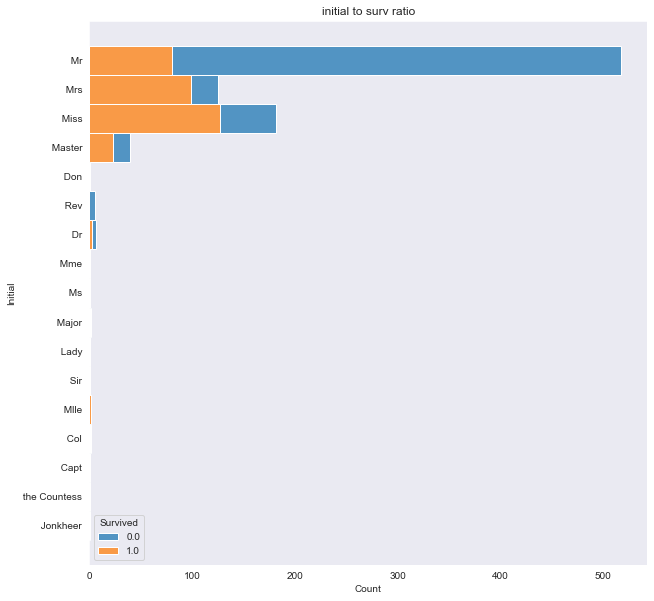

In [38]:
fg, ax=plt.subplots(figsize=(10,10))
sns.histplot(data=df.dropna(), y='Initial',hue='Survived',multiple='stack', ax=ax).set_title('initial to surv ratio')


In [39]:
from sklearn.preprocessing import LabelEncoder


In [40]:
sex_le = LabelEncoder()
sex_le.fit(df.Sex)
sex_transformed = sex_le.transform(df.Sex)
df['Sex'] = sex_transformed

In [41]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Initial
0,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,Mrs
2,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,Mrs
4,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,"Spector, Mr. Woolf",1,28.0,0,0,A.5. 3236,8.0500,S,Mr
414,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C,Dona
415,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr
416,NaN,3,"Ware, Mr. Frederick",1,28.0,0,0,359309,8.0500,S,Mr


In [42]:
embarked_le=LabelEncoder()
embarked_le.fit(df.Embarked)
embarked_transformed=embarked_le.transform(df.Embarked)
df['Embarked']=embarked_transformed

In [43]:
initial_le=LabelEncoder()
initial_le.fit(df.Initial)
initial_transformed=initial_le.transform(df.Initial)
df['Initial']=initial_transformed

In [44]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
413    28.0
414    39.0
415    38.5
416    28.0
417    28.0
Name: Age, Length: 1309, dtype: float64

In [45]:
df.select_dtypes('float64')

,Survived,Age,Fare
0,0.0,22.0,7.2500
1,1.0,38.0,71.2833
2,1.0,26.0,7.9250
3,1.0,35.0,53.1000
4,0.0,35.0,8.0500
...,...,...,...
413,NaN,28.0,8.0500
414,NaN,39.0,108.9000
415,NaN,38.5,7.2500
416,NaN,28.0,8.0500


In [46]:
df['Age']=df.Age.astype(int)

In [47]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Initial
0,0.0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,2,12
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,0,13
2,1.0,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,2,9
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,2,13
4,0.0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,2,12
...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,"Spector, Mr. Woolf",1,28,0,0,A.5. 3236,8.0500,2,12
414,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39,0,0,PC 17758,108.9000,0,3
415,NaN,3,"Saether, Mr. Simon Sivertsen",1,38,0,0,SOTON/O.Q. 3101262,7.2500,2,12
416,NaN,3,"Ware, Mr. Frederick",1,28,0,0,359309,8.0500,2,12


In [48]:
irrelevant=['Name', 'Ticket', 'Fare']
model_df=df.drop(irrelevant,axis=1)
model_df.dropna(inplace=True)

In [49]:
model_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Initial
0,0.0,3,1,22,1,0,2,12
1,1.0,1,0,38,1,0,0,13
2,1.0,3,0,26,0,0,2,9
3,1.0,1,0,35,1,0,2,13
4,0.0,3,1,35,0,0,2,12
...,...,...,...,...,...,...,...,...
886,0.0,2,1,27,0,0,2,15
887,1.0,1,0,19,0,0,2,9
888,0.0,3,0,28,1,2,2,9
889,1.0,1,1,26,0,0,0,12


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
y=model_df['Survived']
x=model_df.drop(['Survived'], axis=1)

In [52]:
x_train, x_test, y_train, y_test=train_test_split(x,y)

In [53]:
print(x_train)

     Pclass  Sex  Age  SibSp  Parch  Embarked  Initial
262       1    1   52      1      1         2       12
544       1    1   50      1      0         0       12
415       3    0   28      0      0         2       13
673       2    1   31      0      0         2       12
363       3    1   35      0      0         2       12
..      ...  ...  ...    ...    ...       ...      ...
247       2    0   24      0      2         2       13
814       3    1   30      0      0         2       12
521       3    1   22      0      0         2       12
345       2    0   24      0      0         2        9
840       3    1   20      0      0         2       12

[668 rows x 7 columns]


In [54]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression().fit(x_train,y_train)
y_pred=log_reg.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.7847533632286996


In [55]:
from sklearn.tree import DecisionTreeClassifier
dec_tree=DecisionTreeClassifier().fit(x_train, y_train)
y_pred=dec_tree.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.7757847533632287


In [56]:
test_df=df[df.Survived.isnull()]
test_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Initial
0,NaN,3,"Kelly, Mr. James",1,34,0,0,330911,7.8292,1,12
1,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",0,47,1,0,363272,7.0000,2,13
2,NaN,2,"Myles, Mr. Thomas Francis",1,62,0,0,240276,9.6875,1,12
3,NaN,3,"Wirz, Mr. Albert",1,27,0,0,315154,8.6625,2,12
4,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22,1,1,3101298,12.2875,2,13
...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,"Spector, Mr. Woolf",1,28,0,0,A.5. 3236,8.0500,2,12
414,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39,0,0,PC 17758,108.9000,0,3
415,NaN,3,"Saether, Mr. Simon Sivertsen",1,38,0,0,SOTON/O.Q. 3101262,7.2500,2,12
416,NaN,3,"Ware, Mr. Frederick",1,28,0,0,359309,8.0500,2,12


In [57]:
test_df=test_df.drop(['Survived'], axis=1)

In [58]:
test_df=test_df.drop(irrelevant, axis=1)

In [59]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Embarked,Initial
0,3,1,34,0,0,1,12
1,3,0,47,1,0,2,13
2,2,1,62,0,0,1,12
3,3,1,27,0,0,2,12
4,3,0,22,1,1,2,13
...,...,...,...,...,...,...,...
413,3,1,28,0,0,2,12
414,1,0,39,0,0,0,3
415,3,1,38,0,0,2,12
416,3,1,28,0,0,2,12


In [60]:
test_set_pred = log_reg.predict(test_df)

In [61]:
pass_id=list(test.PassengerId)
submession_df=pd.DataFrame({"PassengerId":pass_id, "Survived": test_set_pred})

In [62]:
submession_df['Survived']=submession_df.Survived.astype(int)

In [63]:
submession_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [64]:
submession_df.to_csv("submession_int.csv", index=False)